In [129]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
import warnings 

In [130]:
# pd.options.display.max_columns=None
# pd.options.display.max_rows=None
# np.set_printoptions(suppress=True)

In [212]:
df=pd.read_csv(r'C:\Users\91978\Desktop\linearregressionwithsgd_project.csv')
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


In [213]:
df.corr()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
origin,1.000000,-0.562543,-0.609409,-0.581024,0.205873,0.180662,0.563450
cylinders,-0.562543,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.775396
displacement,-0.609409,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.804203
weight,-0.581024,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.831741
acceleration,0.205873,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.420289
year,0.180662,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.579267
Kilometer_per_liter,0.563450,-0.775396,-0.804203,-0.831741,0.420289,0.579267,1.000000


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [215]:
df['horsepower']=df['horsepower'].replace(to_replace='?',value=np.NaN)
df['horsepower']=df['horsepower'].astype('float')
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165.0,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150.0,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150.0,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140.0,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52.0,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84.0,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79.0,2625,18.6,1982,ford ranger,11.904024


In [216]:
df['horsepower']=df['horsepower'].fillna(df['horsepower'].median())

In [217]:
df['origin']=df['origin'].astype('object')

In [218]:
df.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [219]:
df[['car_company','car_model']]=df['name'].str.split(" ",n=1,expand=True)
df.drop('name',axis=1,inplace=True)
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,car_company,car_model
0,1,8,307.0,130.0,3504,12.0,1970,7.652587,chevrolet,chevelle malibu
1,1,8,350.0,165.0,3693,11.5,1970,6.377156,buick,skylark 320
2,1,8,318.0,150.0,3436,11.0,1970,7.652587,plymouth,satellite
3,1,8,304.0,150.0,3433,12.0,1970,6.802299,amc,rebel sst
4,1,8,302.0,140.0,3449,10.5,1970,7.227443,ford,torino


In [220]:
print(sorted(df['car_company'].unique(),reverse=False))

['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt', 'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes', 'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo', 'vw']


In [221]:
df['car_company']=df['car_company'].replace(['chevroelt','chevy'],'chevrolet')
df['car_company']=df['car_company'].replace(['vw','vokswagen'],'volkswagen')
df['car_company']=df['car_company'].replace(['toyouta'],'toyota')
df['car_company']=df['car_company'].replace(['maxda'],'mazda')
df['car_company']=df['car_company'].replace(['mercedes'],'mercedes=benz')


Making All names of car_company Same in spelling 

In [222]:
print(sorted(df['car_company'].unique(),reverse=False))

['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevrolet', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'mazda', 'mercedes-benz', 'mercedes=benz', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'triumph', 'volkswagen', 'volvo']


In [223]:
df['car_model']

0      chevelle malibu
1          skylark 320
2            satellite
3            rebel sst
4               torino
            ...       
393         mustang gl
394             pickup
395            rampage
396             ranger
397               s-10
Name: car_model, Length: 398, dtype: object

In [224]:
import re
def removespace(x):
    return re.sub('[^A-Za-z0-9]+','',(str(x)))

df['car_model'] = df['car_model'].apply(lambda x: removespace(x))

In [225]:
df.car_model
#here we romove the spcae from the ca_model names between str and numbers 

0      chevellemalibu
1          skylark320
2           satellite
3            rebelsst
4              torino
            ...      
393         mustanggl
394            pickup
395           rampage
396            ranger
397               s10
Name: car_model, Length: 398, dtype: object

# statical part 

In [226]:
df.describe()

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.304020,2970.424623,15.568090,1976.010050,9.997073
std,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,3.322917
min,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,3.826293
25%,4.000000,104.250000,76.000000,2223.750000,13.825000,1973.000000,7.440015
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,1976.000000,9.778305
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,1979.000000,12.329168
max,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,19.811697


In [227]:
df.select_dtypes(include='object')[:5]

,origin,car_company,car_model
0,1,chevrolet,chevellemalibu
1,1,buick,skylark320
2,1,plymouth,satellite
3,1,amc,rebelsst
4,1,ford,torino


In [228]:
df.select_dtypes(include='int64')[:5]

,cylinders,weight,year
0,8,3504,1970
1,8,3693,1970
2,8,3436,1970
3,8,3433,1970
4,8,3449,1970


In [229]:
df.select_dtypes(include='float')[:5]

,displacement,horsepower,acceleration,Kilometer_per_liter
0,307.0,130.0,12.0,7.652587
1,350.0,165.0,11.5,6.377156
2,318.0,150.0,11.0,7.652587
3,304.0,150.0,12.0,6.802299
4,302.0,140.0,10.5,7.227443


# EDA Explanatory Data Analysis 

C:\Users\91978\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


This data is left skew 0.45534192556309216


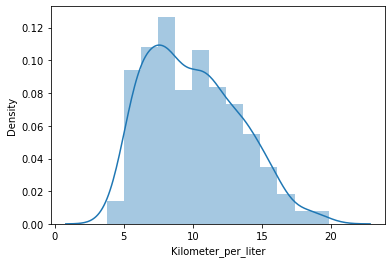

In [230]:
sns.distplot(df['Kilometer_per_liter'])
from scipy.stats import skew
a=skew(df['Kilometer_per_liter'])
print('This data is left skew',a)

C:\Users\91978\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Data is right skew -0.13597864636115267


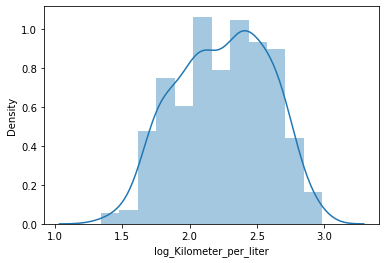

In [231]:
#making log of kilometer_per_liter column 
df['log_Kilometer_per_liter']=np.log(df['Kilometer_per_liter'])
b=skew(df['log_Kilometer_per_liter'])
sns.distplot(df['log_Kilometer_per_liter'])
print('Data is right skew',b)


C:\Users\91978\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='displacement', ylabel='Density'>

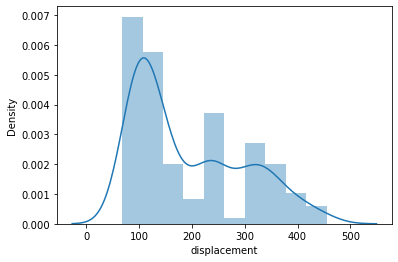

In [232]:
sns.distplot(df['displacement'])

C:\Users\91978\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='acceleration', ylabel='Density'>

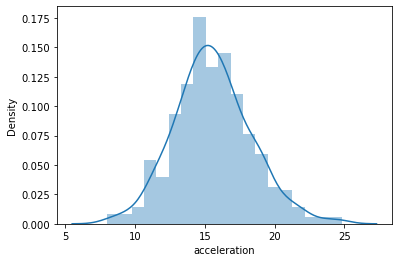

In [233]:
sns.distplot(df['acceleration'])

C:\Users\91978\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cylinders', ylabel='count'>

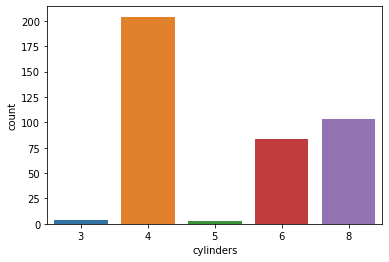

In [234]:
sns.countplot(df['cylinders'])

C:\Users\91978\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

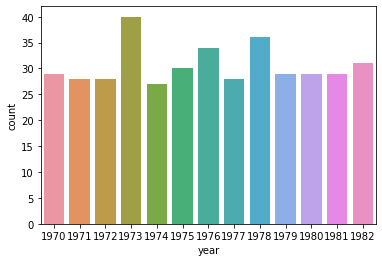

In [235]:
sns.countplot(df['year'])

C:\Users\91978\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight', ylabel='Density'>

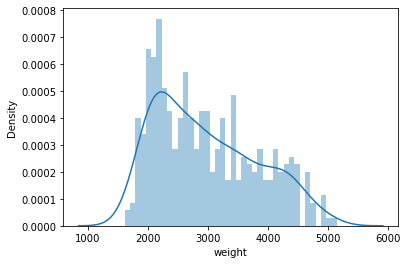

In [236]:
sns.distplot(df['weight'],bins=40)

C:\Users\91978\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='horsepower', ylabel='Density'>

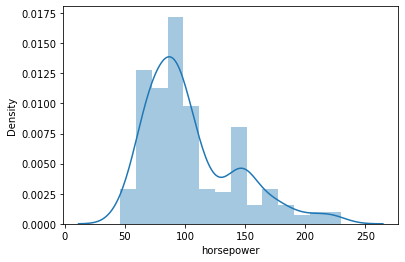

In [237]:
sns.distplot(df['horsepower'])

<AxesSubplot:xlabel='displacement', ylabel='Kilometer_per_liter'>

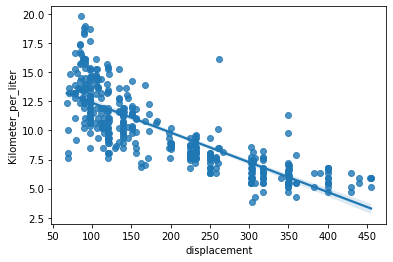

In [238]:
sns.regplot(x=df['displacement'],y=df['Kilometer_per_liter'])

here is the relation between the displacment of vehical or the mailege is inversely propontional 

C:\Users\91978\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


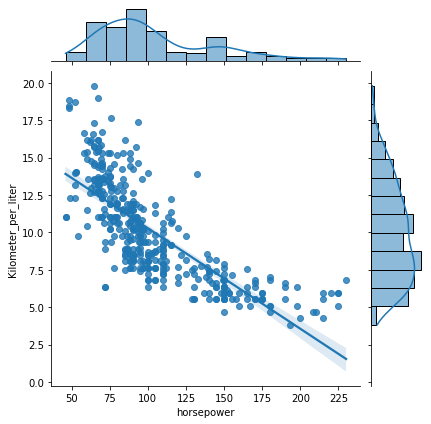

In [239]:
sns.jointplot(df['horsepower'],df['Kilometer_per_liter'],kind='reg')

here in the relation between horsepower of car or mailege is inversely propontional 

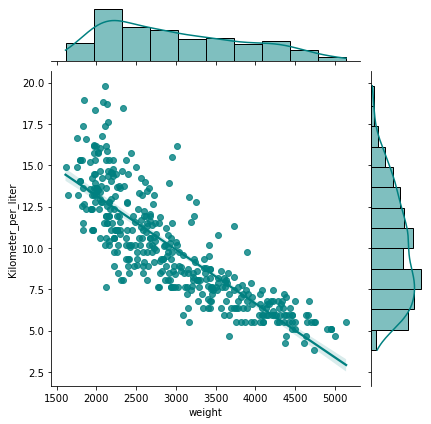

In [251]:
sns.jointplot(df['weight'],df['Kilometer_per_liter'],kind='reg',color='teal')

here the relation between the weight of car and the mailege of car is also inversely propontional 

C:\Users\91978\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


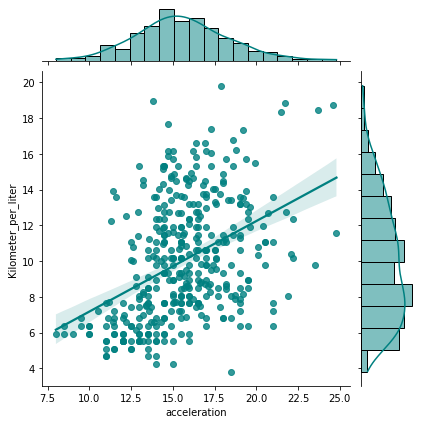

In [258]:
sns.jointplot(df['acceleration'],df['Kilometer_per_liter'],kind='reg',color='teal')

Here the relation between acceleration or car and the Its mailege is directly propontional 
if we increse the acceleration there is increse in the mailege 

<AxesSubplot:xlabel='year', ylabel='Kilometer_per_liter'>

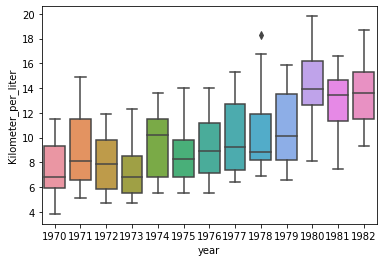

In [262]:
sns.boxplot(x=df['year'],y=df['Kilometer_per_liter'])

the relation between year and the mailege is directly propontional the mailege of car incresing year by year 

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='cylinders'>

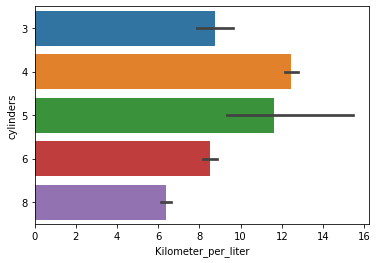

In [265]:
sns.barplot(y=df['cylinders'],x=df['Kilometer_per_liter'],orient='h')

here the highest mailege in respect of cylinders is best when car have a 4 cylinders 

In [246]:
df.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'Kilometer_per_liter', 'car_company',
       'car_model', 'log_Kilometer_per_liter'],
      dtype='object')

In [240]:
df.Kilometer_per_liter

0       7.652587
1       6.377156
2       7.652587
3       6.802299
4       7.227443
         ...    
393    11.478880
394    18.706323
395    13.604599
396    11.904024
397    13.179455
Name: Kilometer_per_liter, Length: 398, dtype: float64

In [241]:
df[['car_company','car_model','Kilometer_per_liter']].sort_values(by='Kilometer_per_liter',ascending=False)

,car_company,car_model,Kilometer_per_liter
322,mazda,glc,19.811697
329,honda,civic1500gl,18.961409
325,volkswagen,rabbitcdiesel,18.833866
394,volkswagen,pickup,18.706323
326,volkswagen,dasherdiesel,18.451237
...,...,...,...
103,chevrolet,impala,4.676581
67,mercury,marquis,4.676581
25,ford,f250,4.251437
26,chevrolet,c20,4.251437


In [283]:
carmodel=df.car_company.value_counts()[:5]
carmodel

ford         51
chevrolet    47
plymouth     31
amc          28
dodge        28
Name: car_company, dtype: int64

In [270]:
df.car_company.nunique()

31

<AxesSubplot:>

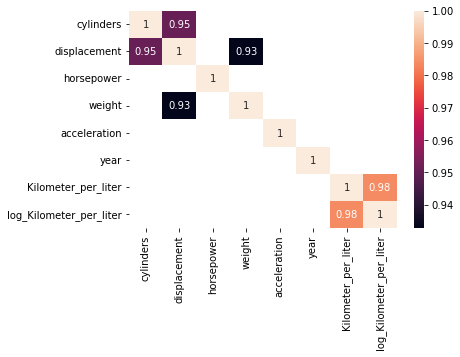

In [271]:
x=df.corr()
sns.heatmap(x[x>0.9],annot=True)

In [284]:
df.drop(['weight','displacement'],axis=1,inplace=True)

In [285]:
df.head()

,origin,cylinders,horsepower,acceleration,year,Kilometer_per_liter,car_company,car_model,log_Kilometer_per_liter
0,1,8,130.0,12.0,1970,7.652587,chevrolet,chevellemalibu,2.035044
1,1,8,165.0,11.5,1970,6.377156,buick,skylark320,1.852722
2,1,8,150.0,11.0,1970,7.652587,plymouth,satellite,2.035044
3,1,8,150.0,12.0,1970,6.802299,amc,rebelsst,1.917261
4,1,8,140.0,10.5,1970,7.227443,ford,torino,1.977885


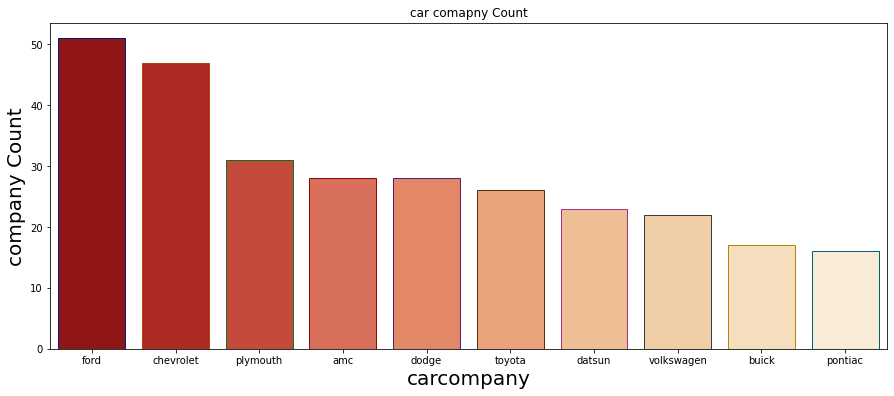

In [281]:
carcompany=list(df.car_company.value_counts()[:10].index)
carcompany_count = list(df.car_company.value_counts()[:10])

plt.subplots(figsize=(15,6))
sns.barplot(x=carcompany, y=carcompany_count, palette= 'OrRd_r',edgecolor=sns.color_palette('dark',10))
plt.title('car comapny Count')
plt.xlabel("carcompany",fontsize=20)
plt.ylabel("company Count",fontsize=20)
plt.show()

here we get to know that which company has the maximum sales 

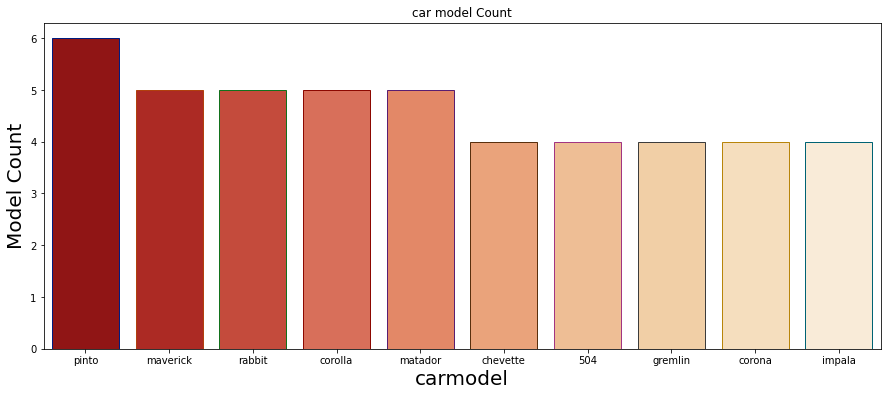

In [282]:
carmodel=list(df.car_model.value_counts()[:10].index)
carmodel_count = list(df.car_model.value_counts()[:10])

plt.subplots(figsize=(15,6))
sns.barplot(x=carmodel, y=carmodel_count, palette= 'OrRd_r',edgecolor=sns.color_palette('dark',10))
plt.title('car model Count')
plt.xlabel("carmodel",fontsize=20)
plt.ylabel("Model Count",fontsize=20)
plt.show()

here we get to know that which model is high in demand  

In [286]:
ford = df[df['car_company']=='ford'][['car_model','cylinders','horsepower','Kilometer_per_liter']].sort_values(by='Kilometer_per_liter',ascending=False)[:10]
ford

,car_model,cylinders,horsepower,Kilometer_per_liter
245,fiesta,4,66.0,15.347688
351,escort4w,4,65.0,14.624944
352,escort2h,4,65.0,12.711797
396,ranger,4,79.0,11.904024
393,mustanggl,4,86.0,11.478880
206,pinto,4,72.0,11.266308
314,fairmont,4,88.0,11.223794
130,pinto,4,80.0,11.053736
236,mustangii22,4,89.0,10.841165
255,fairmontman,4,88.0,10.671107


In [288]:
mazda = df[df['car_company']=='mazda'][['car_model','cylinders','horsepower','Kilometer_per_liter']].sort_values(by='Kilometer_per_liter',ascending=False)[:10]
mazda

,car_model,cylinders,horsepower,Kilometer_per_liter
322,glc,4,65.0,19.811697
376,glccustoml,4,68.0,15.730317
294,glcdeluxe,4,65.0,14.497400
349,glc4,4,68.0,14.497400
246,glcdeluxe,4,52.0,13.944714
358,626,4,74.0,13.434541
319,626,4,75.0,13.306998
377,glccustom,4,68.0,13.179455
334,rx7gs,3,100.0,10.075906
243,rx4,3,110.0,9.140590


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'fiesta'),
  Text(1, 0, 'escort4w'),
  Text(2, 0, 'escort2h'),
  Text(3, 0, 'ranger'),
  Text(4, 0, 'mustanggl'),
  Text(5, 0, 'pinto'),
  Text(6, 0, 'fairmont'),
  Text(7, 0, 'mustangii22'),
  Text(8, 0, 'fairmontman')])

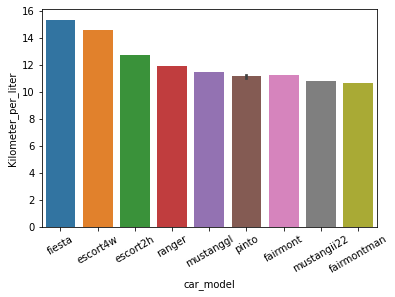

In [292]:
sns.barplot(x=ford['car_model'],y=ford['Kilometer_per_liter'])
plt.xticks(rotation=30)

In [291]:
ford_mazda=df[(df['car_model']=='glc')|(df['car_model']=='fiesta')]
ford_mazda.columns
columns=['car_company','car_model','origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'Kilometer_per_liter', 'log_mileage']
ford_mazda

,origin,cylinders,horsepower,acceleration,year,Kilometer_per_liter,car_company,car_model,log_Kilometer_per_liter
245,1,4,66.0,14.4,1978,15.347688,ford,fiesta,2.730965
322,3,4,65.0,17.9,1980,19.811697,mazda,glc,2.986273


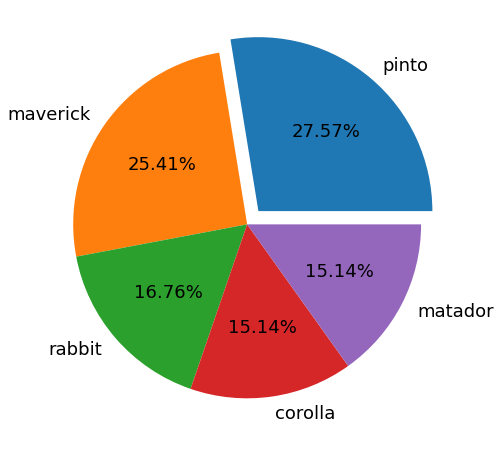

In [296]:
plt.figure(figsize=(12,8))
explode = [0.1,0,0,0,0]
plt.pie(carmodel[:5],explode=explode,labels = df.car_model.value_counts().keys()[:5],autopct="%.2f%%"
        ,textprops={'fontsize':18});

regression analysis 

In [327]:
x=df.drop(['Kilometer_per_liter','log_Kilometer_per_liter','car_model','car_company'],axis=1)
y=df['log_Kilometer_per_liter']

In [328]:
x

,origin,cylinders,horsepower,acceleration,year
0,1,8,130.0,12.0,1970
1,1,8,165.0,11.5,1970
2,1,8,150.0,11.0,1970
3,1,8,150.0,12.0,1970
4,1,8,140.0,10.5,1970
...,...,...,...,...,...
393,1,4,86.0,15.6,1982
394,2,4,52.0,24.6,1982
395,1,4,84.0,11.6,1982
396,1,4,79.0,18.6,1982


In [329]:
from sklearn.preprocessing import MinMaxScaler

In [330]:
mms=MinMaxScaler()

In [331]:
X=mms.fit_transform(x)

In [332]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=19)

In [333]:
x_train

,origin,cylinders,horsepower,acceleration,year
376,3,4,68.0,18.2,1982
269,1,4,75.0,14.5,1978
142,2,4,67.0,15.5,1974
177,2,4,95.0,15.0,1975
272,1,4,85.0,17.6,1978
...,...,...,...,...,...
19,2,4,46.0,20.5,1970
354,2,4,93.5,15.8,1981
245,1,4,66.0,14.4,1978
110,3,4,94.0,16.5,1973


In [334]:
x_test

,origin,cylinders,horsepower,acceleration,year
206,1,4,72.0,13.6,1976
146,1,4,75.0,14.5,1974
297,2,5,77.0,20.1,1979
289,1,8,155.0,14.9,1979
232,1,8,149.0,14.5,1977
...,...,...,...,...,...
256,1,6,100.0,17.2,1978
258,1,6,105.0,15.8,1978
356,3,4,75.0,16.8,1981
84,3,4,88.0,16.5,1972


In [335]:
from sklearn.linear_model import LinearRegression

In [336]:
from sklearn import metrics

In [337]:
lr=LinearRegression()

In [338]:
lr.fit(x_train,y_train)

LinearRegression()

In [341]:
y_pred=lr.predict(x_test)

In [342]:
r2_score=metrics.r2_score(y_test,y_pred)

In [345]:
from sklearn.linear_model import SGDRegressor

In [346]:
sgd=SGDRegressor(alpha=.0001,max_iter=2000,penalty=None,random_state=103)

In [347]:
sgd.fit(x_train,y_train)

SGDRegressor(max_iter=2000, penalty=None, random_state=103)

In [348]:
y_pred_s=sgd.predict(x_test)

In [349]:
MSE = metrics.mean_squared_error(y_test,y_pred_s)
print(MSE)

1.2811305554106724e+30


In [350]:
mae=metrics.mean_absolute_error(y_test,y_pred_s)
print(mae)

1120602085272864.4


In [351]:
print(r2_score,MSE,mae)

0.8469043556627073 1.2811305554106724e+30 1120602085272864.4
